# Album cover classification

This file is intended as an exercise to get us started with Keras. The idea is to go through the steps of creating a very simple model by hand, looking up documentation, not copy-pasting everything, and seeing the errors that occur along the way. Thus, we will use a tiny **album cover classification** dataset and ignore real-world issues such as data augmentation, validation sets, etc.

Some setup code is copied from the following original:

**Author:** [fchollet](https://twitter.com/fchollet)<br>
**Date created:** 2020/04/27<br>
**Last modified:** 2020/04/28<br>
**Description:** Training an image classifier from scratch on the Kaggle Cats vs Dogs dataset.

**Original description**: *This example shows how to do image classification from scratch, starting from JPEG
image files on disk, without leveraging pre-trained weights or a pre-made Keras
Application model.*

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


## Load the data: the REM versus Iron Maiden album cover dataset

Download the `Album_Covers.zip` file from Bb and copy to the same directory as this notebook, and unzip it.

Now we have an `Album_Covers` folder which contain two subfolders, `REM` and `Iron_Maiden`. Each
 subfolder contains image files for each category. All files are approximately 220x220, but we will ask them all to be rescaled to this size below.


In [51]:
!ls Album_Covers


Iron_Maiden  REM


## Generate a `Dataset`


In [52]:
image_size = (220, 220) # any other sizes are resized to this
batch_size = 4
dirname = "../data/Album_Covers"

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dirname,
    image_size=image_size,
    batch_size=batch_size,
)


Found 20 files belonging to 2 classes.


## Visualize the data

Here are two images in the training dataset. 

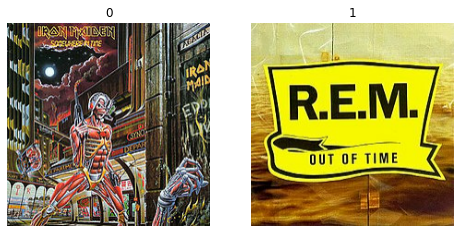

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
for images, labels in train_ds.take(1):
    for i in range(2):
        ax = plt.subplot(1, 2, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")


## Creating a basic model

* Create a basic model, using either `Sequential` (first lines suggested below) or the Functional API. 
* Remember to use a `keras.Input()` as the first element. 
* Use `layers.experimental.preprocessing.Rescaling(1.0 / 255)` as the second element, to scale from `[0, 255]` to `[0, 1]`.
* Use some convolutional layers, max-pooling, batch-norm, dense, different activations, dropout, whatever you like.
* End with a layer suitable for binary classification.

In [54]:
input_shape = (*image_size, 3) # specify 3 colour channels
model = keras.models.Sequential([
    keras.Input(shape=input_shape),
    layers.experimental.preprocessing.Rescaling(1.0 / 255),
    layers.Conv2D(5, (3, 3), strides=2, padding="same"), # 5 neurons, 3x3 kernel
    layers.Conv2D(5, (3, 3), strides=2, padding="same"),
    layers.GlobalAveragePooling2D(), # convert each neuron's output to a scalar
    layers.Dense(1, activation="sigmoid") # classification
])


## Visualise your model

* Use `model.summary()`. 
* Use `plot_model()` also if you like.

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_5 (Rescaling)      (None, 220, 220, 3)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 110, 110, 5)       140       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 55, 55, 5)         230       
_________________________________________________________________
global_average_pooling2d_5 ( (None, 5)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 6         
Total params: 376
Trainable params: 376
Non-trainable params: 0
_________________________________________________________________


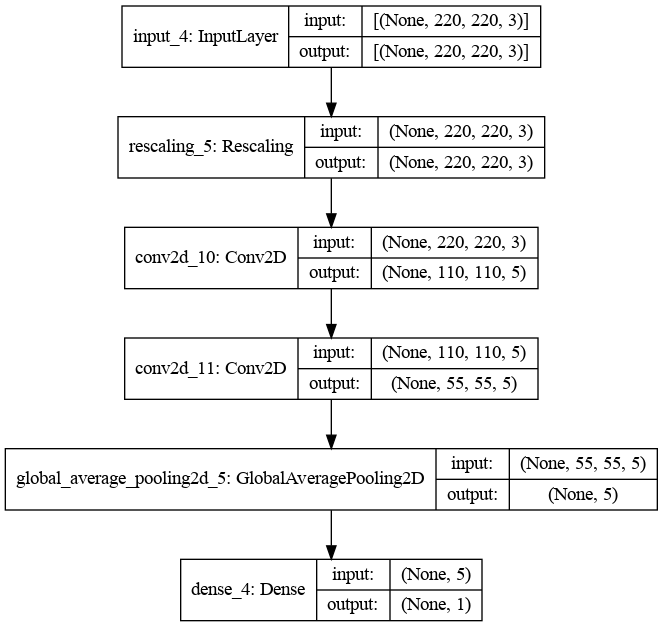

In [56]:
model.summary()
keras.utils.plot_model(model, show_shapes=True)

## Train your model

Train for (say) 5 epochs. We are not aiming for great performance, just an error-free run. Don't worry if the loss does not improve. 

In [57]:
epochs = 5

model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
model.fit(
    train_ds, epochs=epochs
)


Epoch 1/5
5/5 [==============================] - 1s 16ms/step - loss: 0.7076 - accuracy: 0.4236
Epoch 2/5
5/5 [==============================] - 0s 25ms/step - loss: 0.6902 - accuracy: 0.4618
Epoch 3/5
5/5 [==============================] - 0s 18ms/step - loss: 0.6546 - accuracy: 0.5451
Epoch 4/5
5/5 [==============================] - 0s 16ms/step - loss: 0.6917 - accuracy: 0.4236
Epoch 5/5
5/5 [==============================] - 0s 18ms/step - loss: 0.6779 - accuracy: 0.4549


## Make a prediction

Make predictions on the validation set and print them out. Or download a new photo, load it from disk and make a prediction on that, if you prefer. Make sure you understand the predictions.

In [58]:
for x, y in train_ds.take(1): # take 1 batch (4 images with their labels)
    predictions = model.predict(x)
    score = predictions
    print("score", score)
    print("y", y)

score [[0.55789524]
 [0.54676896]
 [0.5935855 ]
 [0.55138224]]
y tf.Tensor([0 1 0 1], shape=(4,), dtype=int32)
